# PROYECTO POKEMON GO

En este Notebook estara el analisis realizado a la base de datos pokemon.csv, el cual es relizado para la materia de Introduccion al analisis de datos apoyado en sofware

## Análisis de Meta data

In [1]:
!pip install openpyxl

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np 
import statistics as sm
import openpyxl as opx
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
base = pd.read_csv('pokemon.csv')
base.head(2)

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False


Se cambiaran las variables a español y las abreviaturas por palabras mas completas y entendibles

In [4]:
base_1=base.rename(columns={'number':'numero', 'name':'nombre', 'type1':'tipo1', 'type2':'tipo2', 'total':'total',
                        'hp':'salud', 'attack':'ataque', 'defense':'defensa', 'sp_attack':'ataque_especial', 
                        'sp_defense':'defensa_especial', 'speed':'velocidad', 'generation':'generacion', 
                        'legendary':'legendario'})
base_1

,numero,nombre,tipo1,tipo2,total,salud,ataque,defensa,ataque_especial,defensa_especial,velocidad,generacion,legendario
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,896,Glastrier,Ice,NaN,580,100,145,130,65,110,30,8,True
1068,897,Spectrier,Ghost,NaN,580,100,65,60,145,80,130,8,True
1069,898,Calyrex,Psychic,Grass,500,100,80,80,80,80,80,8,True
1070,898,Ice Rider Calyrex,Psychic,Ice,680,100,165,150,85,130,50,8,True


In [5]:
base_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   numero            1072 non-null   int64 
 1   nombre            1072 non-null   object
 2   tipo1             1072 non-null   object
 3   tipo2             574 non-null    object
 4   total             1072 non-null   int64 
 5   salud             1072 non-null   int64 
 6   ataque            1072 non-null   int64 
 7   defensa           1072 non-null   int64 
 8   ataque_especial   1072 non-null   int64 
 9   defensa_especial  1072 non-null   int64 
 10  velocidad         1072 non-null   int64 
 11  generacion        1072 non-null   int64 
 12  legendario        1072 non-null   bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 101.7+ KB


In [6]:
base_1['nombre'].value_counts()

Nidoran♂               1
Eternatus              1
Goldeen                1
Lotad                  1
Swampert               1
                      ..
Chingling              1
Deoxys Normal Forme    1
Yamask                 1
Jolteon                1
Dratini                1
Name: nombre, Length: 1072, dtype: int64

Una vez cambiados los nombres se pueden empezar a trabajar con la base de datos, no se pueden retirar los valores nulos con dropna ya que eso eliminaria las filas y/p columnas tambien, ya que el dato es un string no se puede añadir un promedio en estos valores. Se añade una nueva categoria llamada nan para estos valores

In [7]:
base_1['tipo2'] = base_1['tipo2'].fillna(value=np.nan).astype('object')
base_1['tipo2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Water', 'Normal', 'Psychic',
       'Steel', 'Ground', 'Fairy', 'Grass', 'Fighting', 'Electric', 'Ice',
       'Dark', 'Ghost', 'Rock', 'Fire', 'Bug'], dtype=object)

In [8]:
base_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   numero            1072 non-null   int64 
 1   nombre            1072 non-null   object
 2   tipo1             1072 non-null   object
 3   tipo2             574 non-null    object
 4   total             1072 non-null   int64 
 5   salud             1072 non-null   int64 
 6   ataque            1072 non-null   int64 
 7   defensa           1072 non-null   int64 
 8   ataque_especial   1072 non-null   int64 
 9   defensa_especial  1072 non-null   int64 
 10  velocidad         1072 non-null   int64 
 11  generacion        1072 non-null   int64 
 12  legendario        1072 non-null   bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 101.7+ KB


Se ajusta la base de datos para poder trabajar con ella

## Análisis Descriptivo

In [9]:
pokemones = base_1['nombre'].value_counts()
pokemones


Nidoran♂               1
Eternatus              1
Goldeen                1
Lotad                  1
Swampert               1
                      ..
Chingling              1
Deoxys Normal Forme    1
Yamask                 1
Jolteon                1
Dratini                1
Name: nombre, Length: 1072, dtype: int64

Se evidencia que hay 1072 pokemones es decir que cada fila corresponde a un pokemon unico

In [10]:
tipo_1 = set(base_1['tipo1'].unique())
print(tipo_1)
len(tipo_1)


{'Ghost', 'Blastoise', 'Dragon', 'Normal', 'Graass', 'Fighting', 'Ground', 'Water', 'Fire', 'Poison', 'Grass', 'Ice', 'Steel', 'Flying', 'Bug', 'Electric', 'Fairy', 'Psychic', 'Dark', 'Rock'}


20

Hay 20 tipos de pokemones, como hay unos que manejan mas de un tipo algunos pueden ser tipo 1 y tipo 2 a la vez

In [11]:
tipo_2 = set(base_1['tipo2'].unique())
print(tipo_2)
len(tipo_2)

{nan, 'Ghost', 'Dragon', 'Normal', 'Fighting', 'Ground', 'Water', 'Fire', 'Poison', 'Grass', 'Steel', 'Ice', 'Bug', 'Flying', 'Electric', 'Fairy', 'Psychic', 'Dark', 'Rock'}


19

Hay una categoria menos en la variable tipo 2, se usaran los sets de python para ayudar a encontrar la diferencia de ambos conjuntos

In [12]:
tipo_unico = tipo_1.symmetric_difference(tipo_2)
tipo_unico

{'Blastoise', 'Graass', nan}

In [13]:
base_1['tipo1'].value_counts()

Water        136
Normal       117
Grass         94
Bug           83
Psychic       80
Fire          67
Electric      63
Rock          60
Dark          48
Fighting      45
Ghost         43
Ground        42
Poison        42
Dragon        41
Steel         39
Ice           38
Fairy         23
Flying         9
Graass         1
Blastoise      1
Name: tipo1, dtype: int64

In [14]:
tipos_unicos_1=tipo_1 | tipo_2
len(tipos_unicos_1)

21

Con el anterior bloque de codigo se puede identificar algunas cosas: 

1. Hay 3 elementos de diferencia entre las dos variables [nan, 'Blastoise', 'Graass'], el ultimo se puede tomar como un error de digitacion ya que solo hay un valor en toda la base con este nombre, es decir que la unica categoria unica entre las dos bases es Blastoise

2. Ya que nan es una categoria de vacio definida, el len de la variable tipo 2 es 18, en donde se encontrarian las dos categorias de diferencia ['Blastoise', 'Graass']

3. Esto nos ayuda a ver que en total existen 20 categorias de pokemones ya que aunque len dice 21 nan no cuenta como una categoria dentro del conjunto 

## Medidas de Tendencia Central y Tablas de Frecuencias

Se creara una funcion que ayude a generar estas tablas y que unicamente reciba el nombre de la variable

In [15]:
def medidas(variable):
    
    valores = []
    media = np.mean(variable)
    mediana = np.median(variable)
    moda = sm.mode(variable)
    max_atributo = base_1.loc[variable.idxmax()]
    pokemon_max = max_atributo['nombre']
    min_atributo = base_1.loc[variable.idxmin()]
    pokemon_min = min_atributo['nombre']

    valores = [media,mediana,moda,pokemon_max,pokemon_min]

    df = pd.DataFrame(valores,index=['Media','Mediana','Moda','Mejor Pokemon','Peor Pokemon'],columns=['Valor'])

    return df


En esta sección se generan las medidas de tendencia central y se exportan a un Excel para adaptar mejor esas tablas a Word

In [16]:
base_1.keys()

Index(['numero', 'nombre', 'tipo1', 'tipo2', 'total', 'salud', 'ataque',
       'defensa', 'ataque_especial', 'defensa_especial', 'velocidad',
       'generacion', 'legendario'],
      dtype='object')

In [17]:
archivo = pd.ExcelWriter("Medidas.xlsx",engine='openpyxl') 

medidas(base_1['salud']).to_excel(archivo,sheet_name='salud')
medidas(base_1['ataque']).to_excel(archivo,sheet_name='ataque')
medidas(base_1['defensa']).to_excel(archivo,sheet_name='defensa')
medidas(base_1['ataque_especial']).to_excel(archivo,sheet_name='ataque_especial')
medidas(base_1['defensa_especial']).to_excel(archivo,sheet_name='defensa_especial')
medidas(base_1['velocidad']).to_excel(archivo,sheet_name='velocidad')

archivo.save()

Mediante el siguiente bloque de codigo se obtiene la frecuencia relativa de cada uno de los tipos de pokemon en la variable tipo 1 

In [18]:
frecuencia_relativa_1 = (base_1['tipo1'].value_counts())/len(base_1['tipo1'])*100

frecuencia_absoluta_1 = base_1['tipo1'].value_counts()

frecuencias = { 'Frecuencia relativa %':frecuencia_relativa_1,
                'Frecuencia Absoluta':frecuencia_absoluta_1,   
            }
            


In [19]:
archivo_2 = pd.ExcelWriter('frecuencias.xlsx',engine='openpyxl')
df_tipo1 = round(pd.DataFrame(frecuencias,columns=['Frecuencia relativa %','Frecuencia Absoluta']),2)
df_tipo1.to_excel(archivo_2,sheet_name='tabla1')
archivo_2.save()

df_tipo1

,Frecuencia relativa %,Frecuencia Absoluta
Water,12.69,136
Normal,10.91,117
Grass,8.77,94
Bug,7.74,83
Psychic,7.46,80
Fire,6.25,67
Electric,5.88,63
Rock,5.60,60
Dark,4.48,48
Fighting,4.20,45


Se obtiene la frecuencia relativa de las variables de tipo2

In [20]:
frecuencia_relativa_2 = (base_1['tipo2'].value_counts())/len(base_1['tipo2'])*100

frecuencia_absoluta_2 = base_1['tipo2'].value_counts()

frecuencias_2 = { 'Frecuencia relativa %':frecuencia_relativa_2,
                'Frecuencia Absoluta':frecuencia_absoluta_2,   
            }

In [21]:
archivo_3 = pd.ExcelWriter('frecuencias_2.xlsx',engine='openpyxl')
df_tipo2 = round(pd.DataFrame(frecuencias_2,columns=['Frecuencia relativa %','Frecuencia Absoluta']),2)
df_tipo2.to_excel(archivo_3,sheet_name='tabla1')
archivo_3.save()

Como son una gran cantidad de datos es bastante complejo realizar una gráfica de barras por lo que se realizara un diagrama de cajas y bigotes para cada variable cuantitativa y ver su comportamiento y distribución. 

se define una función para poder generar los gráficos de cajas y bigotes ya que son bastantes

In [22]:
def graficos_cajas(base,variable):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    grafico = sns.catplot(x=str(variable),kind='box',data=base,height=3,aspect=3)
    return grafico


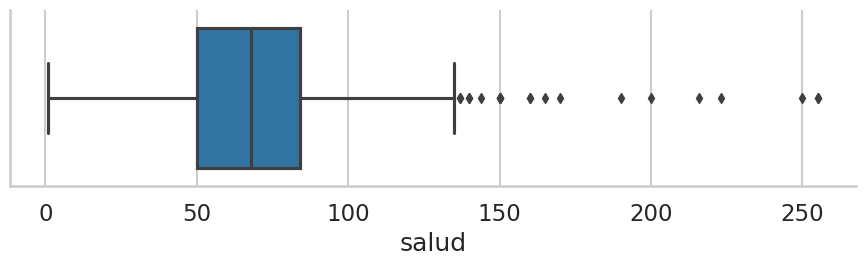

In [23]:
graficos_cajas(base_1,'salud')

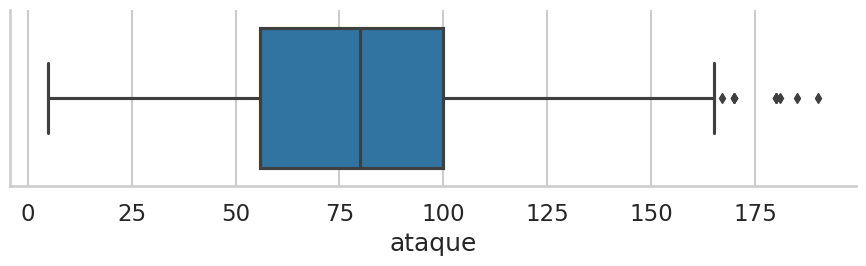

In [24]:
graficos_cajas(base_1,'ataque')

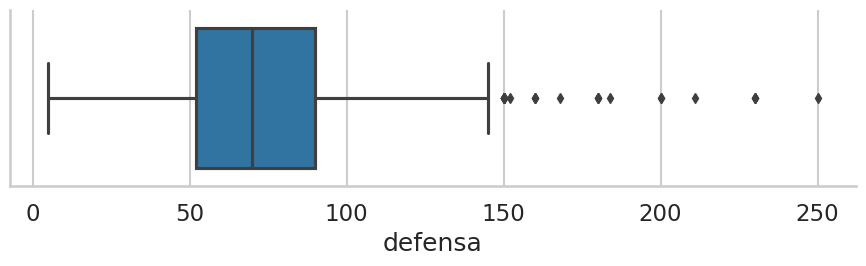

In [25]:
graficos_cajas(base_1,'defensa')

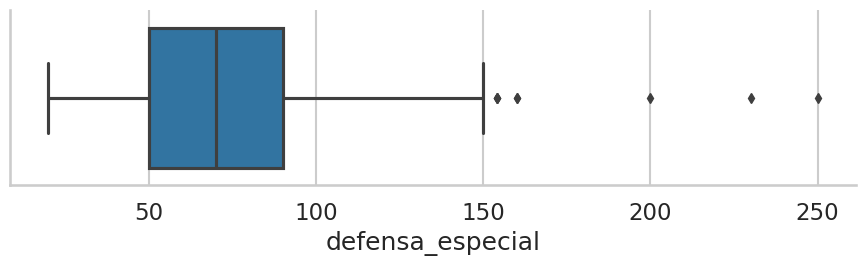

In [26]:
graficos_cajas(base_1,'defensa_especial')

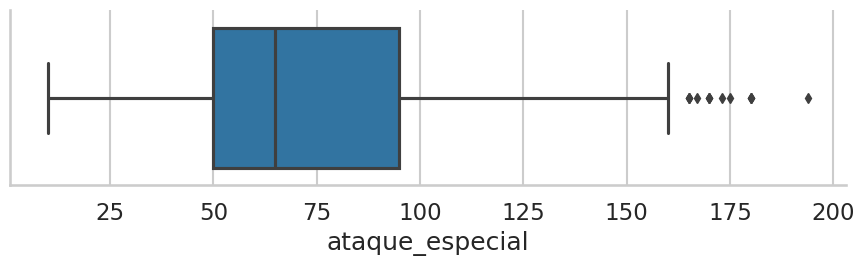

In [27]:
graficos_cajas(base_1,'ataque_especial')

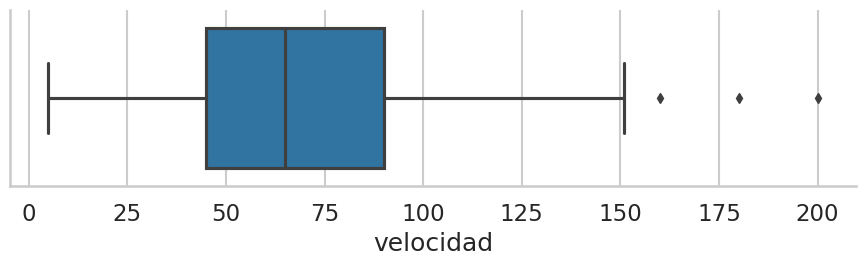

In [28]:
graficos_cajas(base_1,'velocidad')

## Diccionario 

Se realizara el diccionario solicitado con ayuda de 4 listas y dictionary comprehensions, cada lista contentra un elemento; Nombre, tendra el nombre de las variables, Tipo, tendras el tipó de dato de la variable, descripcion tendra la descripcion de cada una de la variables y ejemplo tendra valores que puede tomar la variable, luego con dictionary comprehensions se realizara la union de las 4 listas en un diccionario. 

In [29]:
nombres = base_1.keys()
nombres

Index(['numero', 'nombre', 'tipo1', 'tipo2', 'total', 'salud', 'ataque',
       'defensa', 'ataque_especial', 'defensa_especial', 'velocidad',
       'generacion', 'legendario'],
      dtype='object')

In [30]:
tipos = base.dtypes.tolist()


In [31]:
descripcion = [

    """Esta variable es de tipo entera, ya que contiene el indice de la posicion del pokemon dentro 
    de la base de datos, puede tomar valores desde 1 hasta n ya que es una numeracion""",
    """Es una variable de tipo object ya que este es un objeto generico que puede contener cualquier
    tipo de datos dentro de python en este caso es un string; los valores que pueden tomar son los
    nombres de los Pokemones disponibles""",
    """Es una variable de tipo object ya que este es un objeto generico que puede contener cualquier
    tipo de datos dentro de python en este caso es un string; los valores que pueden tomar son los
    tipos de pokemon que hay en el universo Pokemon""",
    """Es una variable de tipo object ya que este es un objeto generico que puede contener cualquier
    tipo de datos dentro de python en este caso es un string; los valores que pueden tomar son los
    tipos de pokemon que hay en el universo Pokemon""",
    """Esta variable contiene la sumatoria del total de atributos de un Pokemon, es la suma de salud,
    ataque,defensa,ataque especial, defensa especial y velocidad""",
    """La variable salud contiene el valor maximo que puede tener la salud de un Pokemon, es decir que 
    su valor sera un entero o un flotante""",
    """La variable ataque contiene el valor maximo de daño que puede inflingir de un Pokemon, es decir que 
    su valor sera un entero o un flotante""",
    """La variable defensa contiene el valor de resistencia a un ataque que puede tolerar un Pokemon, es decir 
    que su valor sera un entero o un flotante""",
    """Esta variable contiene el valor de daño maximo que puede inflingir de un Pokemon con su habilidad
    especial, es decir que su valor sera un entero o un flotante""",
    """Esta variable contiene el valor la resistencia maxima que puede soportar de un Pokemon con su habilidad
    especial, es decir que su valor sera un entero o un flotante""",
    """La variable velocidad almacena cuan rapido es un pokemon, la base de datos no contiene informacion de
    unidades fisicas, como es una unidad su valor es entero o flotante""",
    """Esta variable contiene la generacion a la cual pertecene el Pokemon, su rango es de 0-8 es decir que 
    solo puede tomar valores dentro de ese intervalo""",
    """Esta variable es de tipo booleano ya que indica si el pokemon es de tipo legenario o no, por lo tanto,
    solo puede tomar valores de True o False"""
]

se obtienen los dos primeros elementos de cada variable para usar como ejemplo en el diccionario

In [32]:
ejemplos = []
for i, j in base_1.iteritems():
    valores = j[:2].tolist()
    ejemplos.append(valores)

In [33]:
tupla = list(zip(nombres,tipos,descripcion,ejemplos))

In [34]:
diccionario = {i:(j,k,w) for (i,j,k,w) in tupla}


Se crea un DataFrame para exportar a Excel y ser mas fácil de llevar a word

In [35]:
diccionario_pd = pd.DataFrame(diccionario,index =['Tipo de Dato','Descripcion','Ejemplos'])
diccionario_pd.transpose()

,Tipo de Dato,Descripcion,Ejemplos
numero,int64,"Esta variable es de tipo entera, ya que contie...","[1, 2]"
nombre,object,Es una variable de tipo object ya que este es ...,"[Bulbasaur, Ivysaur]"
tipo1,object,Es una variable de tipo object ya que este es ...,"[Grass, Grass]"
tipo2,object,Es una variable de tipo object ya que este es ...,"[Poison, Poison]"
total,int64,Esta variable contiene la sumatoria del total ...,"[318, 405]"
salud,int64,La variable salud contiene el valor maximo que...,"[45, 60]"
ataque,int64,La variable ataque contiene el valor maximo de...,"[49, 62]"
defensa,int64,La variable defensa contiene el valor de resis...,"[49, 63]"
ataque_especial,int64,Esta variable contiene el valor de daño maximo...,"[65, 80]"
defensa_especial,int64,Esta variable contiene el valor la resistencia...,"[65, 80]"


In [36]:
libro_diccionario = pd.ExcelWriter('diccionario.xlsx',engine='openpyxl')
diccionario_pd.to_excel(libro_diccionario,sheet_name='diccionario_1')
libro_diccionario.save()



## Tablas de contingencia

Se crean dos tablas de contengencia, una para saber cuantos pokemones de un solo tipo y doble tipo, son o no legendarios y otra para ver de cada tipo cuantos son legendarios o no, esto dando uso a todas las variables cualitativas disponibles

Posicion 11

In [37]:
unico_tipo_no_legendario = base_1[(pd.isna(base_1['tipo2'])) & (base_1['legendario']==False)]
P11 = len(unico_tipo_no_legendario)
P11

455

Posicion 12

In [38]:
unico_tipo_legendario = base_1[(pd.isna(base_1['tipo2'])) & (base_1['legendario']==True)]
P12 = len(unico_tipo_legendario)
P12

43

Posicion 21

In [39]:
doble_tipo_legendario = base_1[(pd.notna(base_1['tipo2'])) & (base_1['legendario']==True)]
P21 = len(doble_tipo_legendario)
P21

75

Posicion 22

In [40]:
doble_tipo_nolegendario = base_1[(pd.notna(base_1['tipo2'])) & (base_1['legendario']==False)]
P22 = len(doble_tipo_nolegendario)
P22

499

In [41]:
fila_1 = [P11,P12,(P11+P12)]
fila_2 = [P21,P22,(P21+P22)]
fila_3 = [(P11+P21),(P12+P22),((P11+P21)+(P12+P22))]

tabla = {
        'Pokemon de unico tipo' : fila_1,
        'Pokemon de doble tipo' : fila_2,
        'Total' : fila_3,
}

tabla_contingencia_1 = pd.DataFrame(tabla,index=['Legendario','No Legendario','Total'],columns=['Pokemon de unico tipo','Pokemon de doble tipo','Total'])




tabla_1 = pd.ExcelWriter('Tabla1.xlsx',engine='openpyxl')

tabla_contingencia_1.to_excel(tabla_1,sheet_name='tabla_1')
tabla_1.save()
tabla_contingencia_1.transpose()

,Legendario,No Legendario,Total
Pokemon de unico tipo,455,43,498
Pokemon de doble tipo,75,499,574
Total,530,542,1072


Con esta función se realizo el cambio de tipo de variable cuantitativa a cualitativa, haciendo equivalente 1=primera, con ayuda de un diccionario para evitar muchos condicionales if

In [42]:
def generacion(variable):

    generacion_cualitativa = []
    generaciones = {
    1 : 'primera',
    2 : 'segunda',
    3 : 'tercera',
    4 : 'cuarta',
    5 : 'quinta',
    6 : 'sexta',
    7 : 'septima',
    8 : 'octava',
    0 : 'cero'}

    for i in variable:
        if i in generaciones:
            generacion_cualitativa.append(generaciones[i])
            
    return generacion_cualitativa


In [43]:
generacion_generada = generacion(base_1['generacion'])

In [44]:
base_1['generacion_cualitativa']=generacion_generada
base_1['generacion'].value_counts()

1    178
5    166
3    160
8    139
4    121
7    114
2    106
6     85
0      3
Name: generacion, dtype: int64

In [45]:
base_1['generacion_cualitativa'].value_counts()

primera    178
quinta     166
tercera    160
octava     139
cuarta     121
septima    114
segunda    106
sexta       85
cero         3
Name: generacion_cualitativa, dtype: int64

In [46]:
tabla_contingencia_2 = pd.DataFrame(pd.crosstab(base_1['legendario'],base_1['generacion_cualitativa']))

tabla_2 = pd.ExcelWriter('Tabla_2.xlsx',engine='openpyxl')
tabla_contingencia_2.to_excel(tabla_2,sheet_name='tabla_2')
tabla_2.save()

tabla_contingencia_2.transpose()

legendario,False,True
generacion_cualitativa,,
cero,0,3
cuarta,105,16
octava,116,23
primera,171,7
quinta,146,20
segunda,100,6
septima,99,15
sexta,75,10
tercera,142,18


In [47]:
base_2 = base_1.loc[:,['salud','ataque','defensa','ataque_especial','defensa_especial','velocidad']]

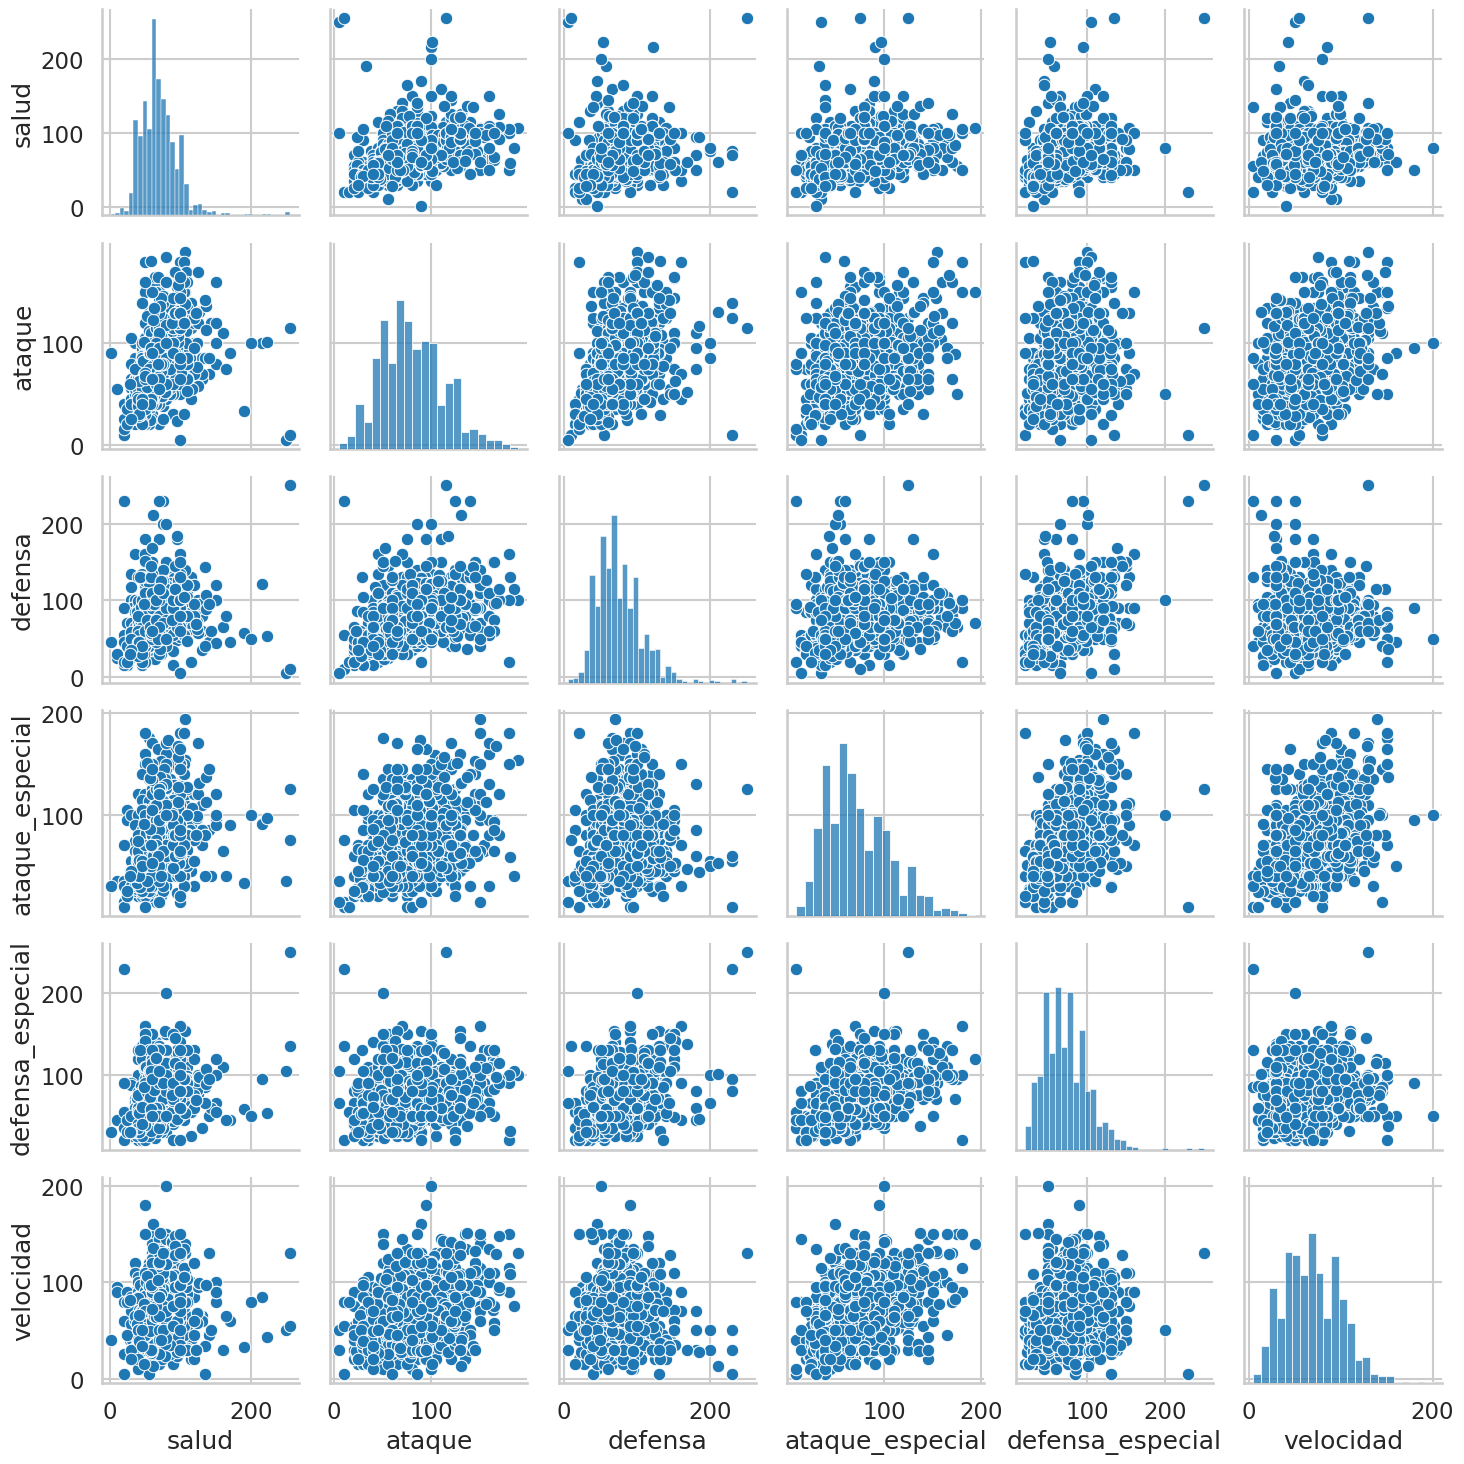

In [48]:
sns.pairplot(base_2)

Aparentemente nos e ve correlacion

In [49]:
correlacion = round(base_2.corr(),3)
correlacion

,salud,ataque,defensa,ataque_especial,defensa_especial,velocidad
salud,1.000,0.455,0.303,0.361,0.388,0.176
ataque,0.455,1.000,0.461,0.362,0.261,0.364
defensa,0.303,0.461,1.000,0.219,0.536,0.003
ataque_especial,0.361,0.362,0.219,1.000,0.507,0.437
defensa_especial,0.388,0.261,0.536,0.507,1.000,0.220
velocidad,0.176,0.364,0.003,0.437,0.220,1.000


<AxesSubplot: >

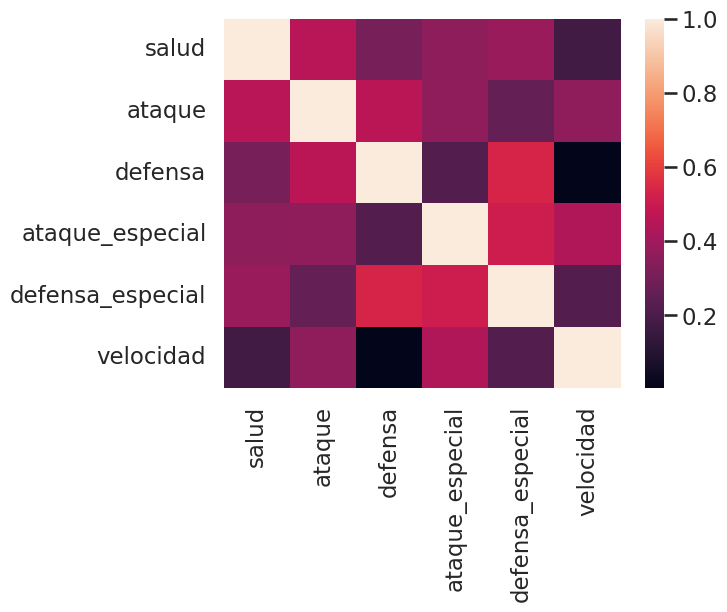

In [50]:
sns.heatmap(correlacion)

La matriz de correlacion y el grafico de correlación lo corroboran

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ff5d3674-dc04-4b8a-a11c-ad6b6d36b2f8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>